<a href="https://colab.research.google.com/github/urmzd/rabbit-classifier/blob/main/src/rc_e1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!curl https://raw.githubusercontent.com/urmzd/rabbit-classifier/main/resources/data.csv --output data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9459  100  9459    0     0  69043      0 --:--:-- --:--:-- --:--:-- 69551


In [54]:
!apt-get update -y
!apt-get install libjpeg-dev libpng-dev -y

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,628 kB]
Get:13 http://ar

In [61]:
import pandas as pd
import requests
import os
import re
import pathlib

DATA_PATH="/content/data.csv"
IMAGE_PATH="/content/images"

table = pd.read_csv(DATA_PATH, usecols=range(2))

def init_image_directory(image_path=IMAGE_PATH) -> None:
  os.mkdir(image_path)

def download_image_to_location(link: str) -> pathlib.Path:
  file_name_regex = re.compile(r".*\/(.*\.(png|jpeg|jpg)).*")
  regex_matches = file_name_regex.match(link)

  if not regex_matches:
    raise Exception(f"Failed to match file_name for link {link}")

  file_name = regex_matches.group(1)
  image = requests.get(link)

  content_path = pathlib.Path(IMAGE_PATH)
  content_path.mkdir(parents=True, exist_ok=True)

  file_path = content_path / file_name

  with open(file_path, "wb") as handle:
    handle.write(image.content)

  return file_path


table

file_path = download_image_to_location(table.iloc[2,1])

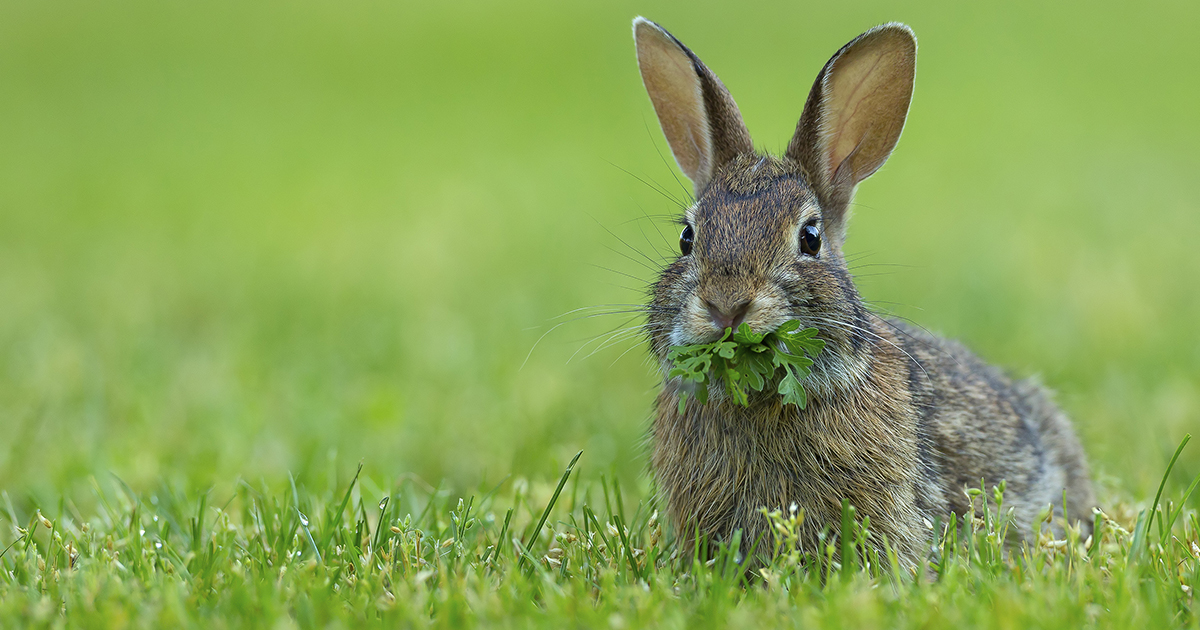

array([[[ 86, 170, 142],
        [ 89, 173, 145],
        [ 87, 171, 143],
        ...,
        [ 92, 183, 150],
        [ 92, 183, 150],
        [ 92, 183, 150]],

       [[ 87, 171, 143],
        [ 87, 171, 143],
        [ 85, 169, 141],
        ...,
        [ 92, 183, 150],
        [ 92, 183, 150],
        [ 92, 183, 150]],

       [[ 86, 170, 142],
        [ 85, 169, 141],
        [ 87, 171, 143],
        ...,
        [ 92, 183, 150],
        [ 90, 181, 148],
        [ 90, 181, 148]],

       ...,

       [[ 81, 168, 134],
        [ 78, 168, 133],
        [ 71, 164, 127],
        ...,
        [ 65, 174, 142],
        [ 68, 168, 138],
        [ 71, 161, 131]],

       [[ 77, 164, 130],
        [ 77, 167, 132],
        [ 75, 168, 131],
        ...,
        [ 66, 175, 143],
        [ 64, 171, 139],
        [ 67, 168, 136]],

       [[ 80, 167, 134],
        [ 78, 168, 133],
        [ 74, 164, 129],
        ...,
        [ 67, 178, 146],
        [ 68, 175, 143],
        [ 71, 170, 138]]

In [67]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
from typing import NewType
import numpy as np

Image = NewType('Image', np.array)

def download_and_show_image(file_path: pathlib.Path) -> Image:
  img = cv2.imread(str(file_path))
  cv2_imshow(img)
  return img

download_and_show_image(file_path)